## Dependicies 

* Juypter 1.0.0
* Matplotlib 2.1.0
* MKL 2017.0.4
* Numpy 1.13.3
* Pandas 0.20.3
* Python 3.6.3
* Seaborn 0.8.0
* Theano 1.0.1
* PYMC3 3.2

## Below various libraries are imported

% matplotlib inline is a magic function so that graphs are displayed within the notebook 
* Matplotlib is for visualization
* Numpy is for multidimensional arrays and matricies 
* Pandas is for data manipulation and analysis
* Pymc3 is for Bayesian statistical modeling
* Seaborn is another plotting/visualization package based on matplotlib and is used mainly for stat visualization 

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns

In [2]:
# Initialize i as second year. Doing this for while loop a few lines below 
i = 1982
# avgMonth will end up holding the averages for each month over the 37 years
avgMonth = []
# JanuaryData will hold all the January values
JanuaryData = []
# DecemberData will hold all the December values 
DecemberData = []
# regYrStart and end are lists that determine where to slice the dataframe in order to average each month's data
regYrStart = [0,31,59,90,120,151,181,212,243,273,304,334]
regYrEnd = [31,59,90,120,151,181,212,243,273,304,334,365]
# leapYrStart and end are lists that are used when leap years occur (9 times over the 37 years)
leapYrStart = [0,31,60,91,121,152,182,213,244,274,305,335]
leapYrEnd = [31,60,91,121,152,182,213,244,274,304,334,365]

In [3]:
""" I'm using read_table to convert the data into a pandas dataframe
In this case x will be the data for the year 1981
The first paramter is the location of the data, the second is how to seperate the data, which in this case is 
separated by |.
The final parameter is telling pandas to skip the first 3 rows of the data since the labels are not needed
"""
x = pd.read_table("ftp://ftp.cpc.ncep.noaa.gov/htdocs/degree_days/weighted/daily_data/1981/Population.Heating.txt", delimiter="|", skiprows=[0,1,2])
# Below I am changing the region column as the index instead of the standard 0, 1, ... n
x = x.set_index('Region')

In [4]:
# Let's look over the first year's dataframe. It has 365 columns which is good since this year is not a leap year
x

,19810101,19810102,19810103,19810104,19810105,19810106,19810107,19810108,19810109,19810110,...,19811222,19811223,19811224,19811225,19811226,19811227,19811228,19811229,19811230,19811231
Region,,,,,,,,,,,,,,,,,,,,,
1,51,46,55,66,62,51,42,51,58,53,...,40,32,31,34,39,37,36,32,38,44
2,45,42,50,59,56,47,42,51,56,52,...,38,25,28,32,36,34,32,30,37,39
3,36,43,51,62,59,48,49,57,55,57,...,34,36,41,41,36,35,38,45,48,39
4,33,40,46,55,47,39,47,48,48,54,...,36,44,44,42,39,41,47,53,48,44
5,24,23,26,27,34,31,23,30,31,31,...,21,9,12,16,20,19,18,16,21,22
6,24,29,28,30,42,36,32,39,35,37,...,20,15,27,29,24,21,20,22,30,26
7,14,17,17,18,22,18,19,20,18,18,...,6,16,23,26,20,16,13,19,20,16
8,22,22,23,23,24,26,26,28,28,27,...,29,38,38,33,33,32,35,33,29,29
9,14,16,14,15,14,15,17,18,17,16,...,21,22,21,20,19,19,21,21,19,20


In [5]:
""" jan_range and dec_rangeReg and Leap are for slicing the 1981-2017 data for both Janaury and December
(JanuaryData and DecemberData)
The for loop puts all the January and December days into their respective lists for the 1981 data, while
the while loop in two lines will take care of the rest
"""
jan_range = range(0,31)
dec_rangeReg = range(334,365)
dec_rangeLeap = range(335,366)
for k in jan_range:
    JanuaryData.append(x.iloc[9,k])
for k in dec_rangeReg:
    DecemberData.append(x.iloc[9,k])

In [6]:
""" The year 1981 is not a leap year so I'm going to slice over the dataframe for each month using the regular 
year slices and average each month before playing the average into the avgMonth list. 
iloc is used for integer based slicing and since I only care about the mean CONUS data, I'm doing to keep only 
the last row (ie 9). j and k are taken from regYrStart and regYrEnd in order to gather the data for each month 
"""
for j, k in zip(regYrStart, regYrEnd):
            z = x.iloc[9,j:k]
            avgMonth.append(z.mean())

Note the while loop below contains the longest runtime out of all the lines in the program

In [7]:
# I've loop up the 9 leap years and placed them in a list
leapYears = [1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]
"""
Now I'm using a while loop to add the rest of the years (1982-2017) to the dataframe and this will be called
result. Also, I've included a for loop to gather the rest of the months' averages with a nested loop statment 
to keep track of the leap years
"""
while(i < 2018):
    # Gather year data from site and convert it into a dataframe like before 
    y = pd.read_table("ftp://ftp.cpc.ncep.noaa.gov/htdocs/degree_days/weighted/daily_data/%d/Population.Heating.txt" %(i), delimiter="|", skiprows=[0,1,2])
    # set the index as the region column like I did before
    y = y.set_index('Region')
    """The pandas concat feature will join the first dataframe (for the first iteration result will contain
    1981 and 1982. Each successive iteration will add the subsequent year to the dataframe. Axis = 1 means the
    dataframe will be joined along the columns versus axis = 0, which joins the two dataframes by the index
    """
    result = pd.concat([x,y], axis=1)
    # The line below allows the next year to be addded to the result dataframe
    x = result
    """The statments below check if the year is a leap year or not. After that, all the January and December
    days are added to their respective lists and the mean of each month over the year is placed in the 
    avgMonth list.
    """
    if(i in leapYears):
        for j, k in zip(leapYrStart, leapYrEnd):
            z = y.iloc[9,j:k]
            avgMonth.append(z.mean()) 
        for k in jan_range:
            JanuaryData.append(y.iloc[9,k])
        for k in dec_rangeLeap:
            DecemberData.append(y.iloc[9,k])
    else:
        for j, k in zip(regYrStart, regYrEnd):
            z = y.iloc[9,j:k]
            avgMonth.append(z.mean())
        for k in jan_range:
            JanuaryData.append(y.iloc[9,k])
        for k in dec_rangeReg:
            DecemberData.append(y.iloc[9,k])
    i += 1

In [8]:
# I'm printing out the avgMonth list to get an idea of the means
print(avgMonth)

[30.967741935483872, 24.035714285714285, 19.193548387096776, 8.2333333333333325, 5.032258064516129, 0.73333333333333328, 0.096774193548387094, 0.12903225806451613, 2.4666666666666668, 10.32258064516129, 16.399999999999999, 26.870967741935484, 33.70967741935484, 26.821428571428573, 19.451612903225808, 13.333333333333334, 3.2580645161290325, 1.6666666666666667, 0.16129032258064516, 0.4838709677419355, 2.6000000000000001, 8.5483870967741939, 17.166666666666668, 22.193548387096776, 27.774193548387096, 24.571428571428573, 18.35483870967742, 13.800000000000001, 5.741935483870968, 1.2333333333333334, 0.12903225806451613, 0.096774193548387094, 2.4333333333333331, 7.645161290322581, 16.800000000000001, 31.548387096774192, 31.580645161290324, 22.689655172413794, 21.741935483870968, 12.1, 5.258064516129032, 0.80000000000000004, 0.096774193548387094, 0.096774193548387094, 3.2999999999999998, 6.833333333333333, 18.517241379310345, 22.333333333333332, 33.645161290322584, 28.214285714285715, 17.25806

In [9]:
# Should expect 444 months (12 * 37). It is so we're good here
print(len(avgMonth))

444


In [10]:
# Now, let's print the JanuaryData to get an idea of it
print(JanuaryData)

[28, 29, 33, 37, 38, 33, 31, 36, 37, 36, 39, 41, 38, 33, 30, 32, 34, 33, 28, 26, 26, 27, 25, 25, 24, 22, 22, 25, 28, 31, 33, 27, 29, 28, 25, 27, 28, 29, 35, 37, 44, 48, 45, 41, 39, 38, 38, 44, 42, 33, 29, 29, 32, 31, 33, 35, 35, 35, 30, 28, 26, 25, 29, 28, 29, 31, 28, 24, 22, 22, 24, 22, 21, 26, 29, 27, 27, 31, 32, 35, 37, 37, 34, 30, 26, 25, 26, 28, 29, 28, 26, 24, 24, 34, 30, 28, 25, 23, 23, 25, 28, 27, 29, 35, 38, 36, 34, 36, 38, 37, 38, 42, 46, 47, 43, 34, 27, 22, 23, 24, 26, 26, 26, 29, 23, 26, 31, 32, 30, 29, 27, 30, 34, 34, 35, 38, 36, 33, 34, 36, 33, 31, 33, 43, 49, 42, 36, 32, 30, 35, 35, 33, 34, 34, 35, 27, 26, 23, 25, 28, 31, 34, 37, 33, 26, 25, 24, 26, 32, 32, 27, 21, 16, 17, 20, 21, 21, 25, 27, 26, 27, 34, 38, 33, 30, 27, 28, 28, 28, 28, 29, 27, 24, 26, 28, 27, 28, 28, 25, 23, 23, 27, 32, 31, 30, 32, 33, 33, 36, 39, 36, 35, 35, 32, 28, 24, 25, 31, 33, 34, 33, 39, 42, 43, 41, 39, 39, 38, 33, 31, 37, 36, 30, 25, 23, 23, 24, 26, 30, 31, 29, 29, 34, 36, 33, 28, 22, 18, 27, 26,

In [11]:
""" Now let's print out the mean of the JanuaryData. Since it is a list, first I'm going to convert it to
an array named JanuaryDataArray and use the mean method to print out the mean"""
JanuaryDataArray = np.asarray(JanuaryData)
print(JanuaryDataArray.mean())

28.3121185702


In [12]:
# Finally, let's make sure the JanuaryData has 1147 elements (31 days * 37 years)
print(len(JanuaryData))

1147


In [13]:
# Now the same with the DecemberData
print(DecemberData)

[23, 20, 21, 22, 24, 24, 21, 19, 24, 28, 28, 27, 27, 27, 27, 28, 30, 33, 37, 37, 32, 26, 24, 27, 28, 28, 26, 27, 28, 31, 29, 14, 11, 11, 11, 12, 14, 20, 23, 26, 29, 28, 32, 35, 30, 24, 21, 25, 27, 26, 25, 25, 23, 20, 17, 16, 17, 21, 19, 24, 31, 31, 26, 26, 24, 23, 23, 23, 26, 28, 26, 23, 21, 22, 21, 21, 23, 28, 31, 34, 38, 40, 39, 37, 41, 46, 51, 47, 39, 34, 36, 42, 39, 21, 22, 24, 28, 30, 30, 33, 28, 23, 21, 19, 19, 18, 19, 19, 18, 18, 20, 22, 22, 21, 21, 24, 25, 27, 29, 23, 16, 13, 17, 22, 23, 27, 32, 29, 26, 27, 27, 25, 23, 24, 25, 27, 31, 35, 36, 32, 31, 34, 38, 37, 36, 34, 27, 26, 34, 40, 34, 32, 31, 30, 27, 23, 22, 21, 24, 26, 26, 24, 22, 22, 25, 29, 29, 32, 31, 25, 23, 22, 22, 24, 25, 27, 28, 27, 25, 23, 24, 26, 27, 27, 27, 26, 23, 24, 23, 22, 24, 24, 22, 20, 17, 16, 18, 20, 24, 26, 26, 29, 31, 31, 27, 22, 22, 24, 24, 24, 22, 25, 28, 28, 31, 35, 33, 24, 25, 21, 22, 24, 21, 19, 22, 27, 31, 33, 35, 32, 26, 25, 32, 35, 34, 28, 21, 20, 22, 22, 21, 24, 27, 27, 27, 32, 32, 28, 26, 26,

In [14]:
DecemberDataArray = np.asarray(DecemberData)
print(DecemberDataArray.mean())

25.6669572799


In [15]:
print(len(DecemberData))

1147


In [16]:
# Now let's see the result. I'm expecting 13514 columns (37 years * 365 days + 9 extra days due to leap years)
result

,19810101,19810102,19810103,19810104,19810105,19810106,19810107,19810108,19810109,19810110,...,20171222,20171223,20171224,20171225,20171226,20171227,20171228,20171229,20171230,20171231
Region,,,,,,,,,,,,,,,,,,,,,
1,51,46,55,66,62,51,42,51,58,53,...,40,32,32,34,43,53,59,59,57,59
2,45,42,50,59,56,47,42,51,56,52,...,31,25,30,33,43,49,54,53,50,55
3,36,43,51,62,59,48,49,57,55,57,...,29,32,41,47,58,62,60,54,54,60
4,33,40,46,55,47,39,47,48,48,54,...,39,45,47,55,61,64,57,54,62,68
5,24,23,26,27,34,31,23,30,31,31,...,12,7,12,20,21,22,27,26,24,29
6,24,29,28,30,42,36,32,39,35,37,...,9,9,22,33,31,35,37,33,32,39
7,14,17,17,18,22,18,19,20,18,18,...,9,19,19,24,23,28,28,23,19,27
8,22,22,23,23,24,26,26,28,28,27,...,36,33,34,30,32,29,26,24,27,30
9,14,16,14,15,14,15,17,18,17,16,...,23,20,18,17,17,15,13,11,12,15


In [17]:
"""Months444 will represent each month for the 444 months when I plot the averages for each month starting
with Month 1 as Jan. 1981 and ending with month 444 """
Months444 = range(1,445)

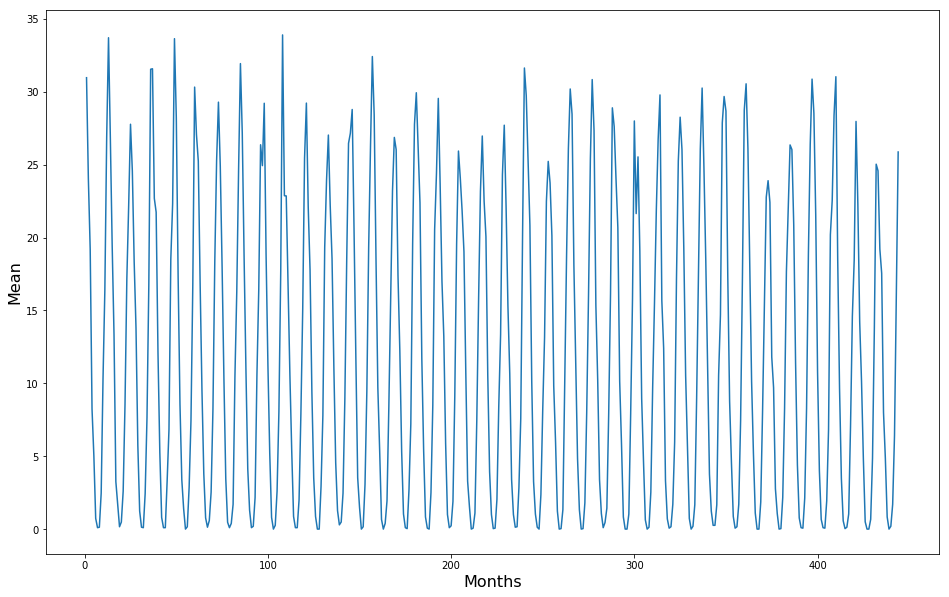

In [18]:
# Now I'm going to plot the data 
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(Months444, avgMonth);
ax.set_xlabel("Months", fontsize=16);
ax.set_ylabel("Mean", fontsize=16);

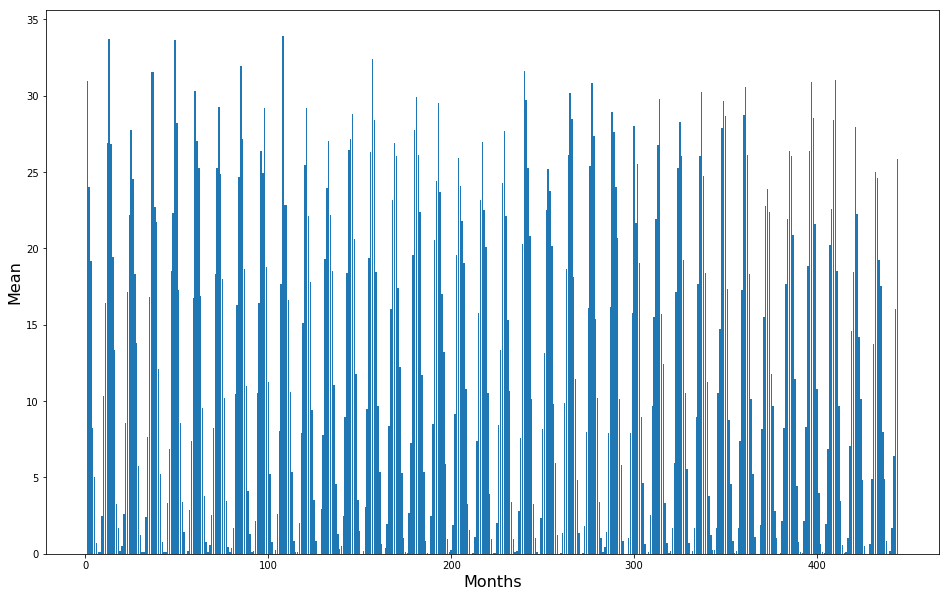

In [19]:
# Let's try a bar plot insted
# Now I'm going to plot the data 
fig, ax = plt.subplots(figsize=(16,10))
ax.bar(Months444, avgMonth);
ax.set_xlabel("Months", fontsize=16);
ax.set_ylabel("Mean", fontsize=16);

In [20]:
# In this case i is now we are going to use i agin for a different while loop.
# Having the average data for each month was good, but we can do better.
# How seeing the mean for each month over the 37 years
i = 0
monthList = []
meanList = []
# For the while loop we are going to calculate the mean for each month by using slices over the avgMonth list
while(i < 12):
    monthRange = range(i, 444,12)
    for j in monthRange:
        monthList.append(avgMonth[j])
    # We need to convert the list into a numpy array in order to take advanatage of its mean method
    monthArray = np.asarray(monthList)
    # using numpy's mean method
    monthMean = monthArray.mean()
    meanList.append(monthMean)
    # Clear monthList at the end in order to make sure the average is taken only over all the Jan months, etc.
    monthList = []
    i += 1

In [21]:
# Let's see the mean list. It should only have 12 balues in it, which it does. 
print(meanList)

[28.312118570183085, 25.371255491945149, 18.358326068003485, 10.62972972972973, 4.4176111595466434, 0.97027027027027024, 0.06625980819529205, 0.16129032258064516, 2.077477477477478, 8.1982563208369665, 17.039049394221809, 25.667916303400176]


In [22]:
# Make a months list so we can plot mean v month
months = ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']

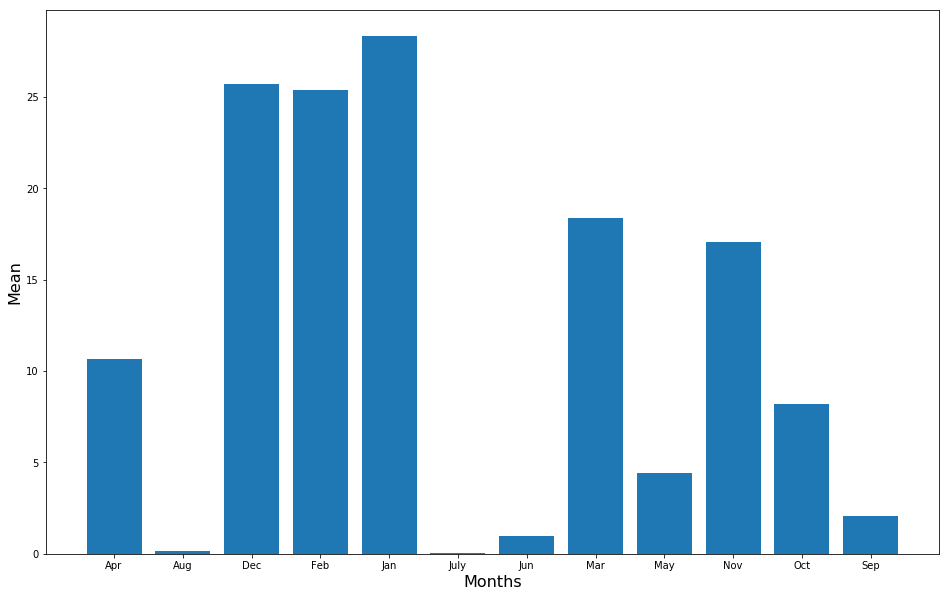

In [23]:
# Plot the mean of each month 
fig, ax = plt.subplots(figsize=(16,10))
ax.bar(months, meanList);
ax.set_xlabel("Months", fontsize=16);
ax.set_ylabel("Mean", fontsize=16);

In [24]:
# Make a months list so we can plot mean v month
months = [1,2,3,4,5,6,7,8,9,10,11,12]

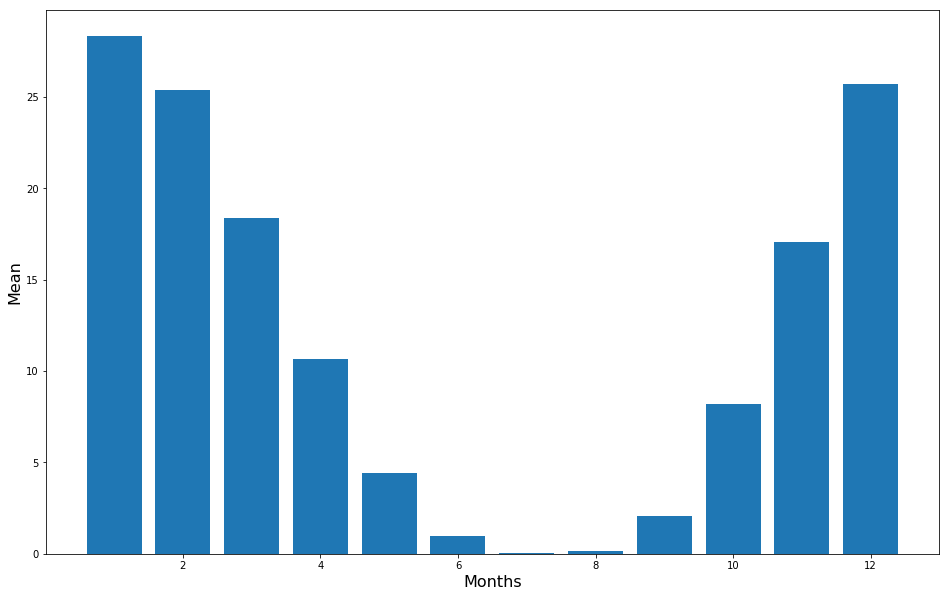

In [25]:
# Plot the mean of each month 
fig, ax = plt.subplots(figsize=(16,10))
ax.bar(months, meanList);
ax.set_xlabel("Months", fontsize=16);
ax.set_ylabel("Mean", fontsize=16);

In [39]:
# With JanuaryData
with pm.Model() as model:
    mu = pm.Uniform('mu', lower=0, upper=100)
    sd = pm.Uniform('sd', lower=1, upper=20)
    n = pm.Normal('n', mu=mu, sd=sd, observed=JanuaryData)

    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [00:03<00:00, 1424.77it/s]


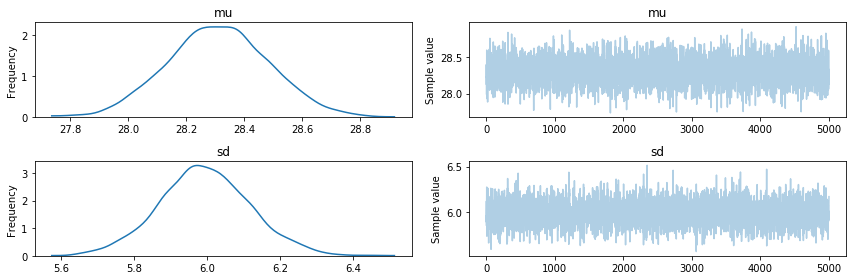

In [40]:
pm.traceplot(trace);

In [41]:
ppc = pm.sample_ppc(trace, samples=5000, model=model, size=100)

100%|██████████| 5000/5000 [00:01<00:00, 3238.21it/s]


In [42]:
JanuaryArray = np.asarray(JanuaryData)

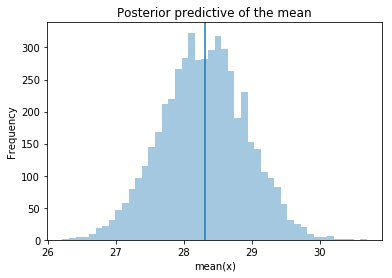

In [43]:
ax = plt.subplot()
sns.distplot([n.mean() for n in ppc['n']], kde=False, ax=ax)
ax.axvline(JanuaryArray.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [44]:
# With DecemberData
with pm.Model() as model:
    mu = pm.Uniform('mu', lower=0, upper=100)
    sd = pm.Uniform('sd', lower=1, upper=20)
    n = pm.Normal('n', mu=mu, sd=sd, observed=DecemberData)

    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [00:03<00:00, 1431.55it/s]


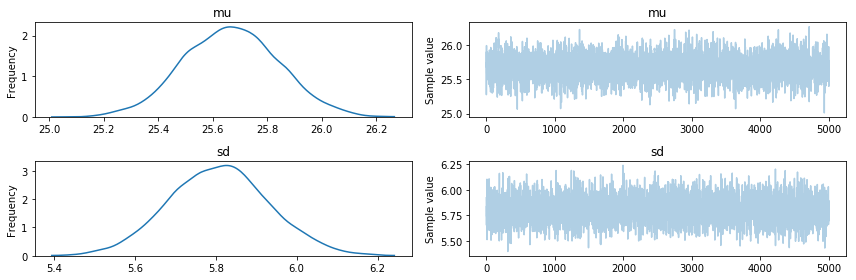

In [45]:
pm.traceplot(trace);

In [46]:
ppc = pm.sample_ppc(trace, samples=5000, model=model, size=100)

100%|██████████| 5000/5000 [00:01<00:00, 2934.43it/s]


In [47]:
DecemberArray = np.asarray(DecemberData)

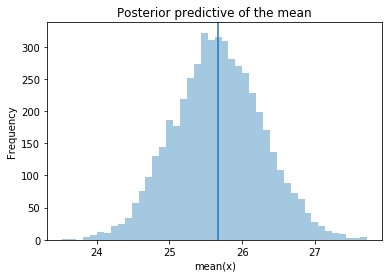

In [49]:
ax = plt.subplot()
sns.distplot([n.mean() for n in ppc['n']], kde=False, ax=ax)
ax.axvline(DecemberArray.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [50]:
JD_Array = JanuaryArray - DecemberArray

In [51]:
print(JD_Array)

[  5   9  12 ...,  -9  -9 -16]


In [52]:
print(JD_Array.shape)

(1147,)


In [53]:
print(JD_Array.mean())

2.64516129032


In [62]:
with pm.Model() as model:
    mu = pm.Uniform('mu', lower=0, upper=100)
    sd = pm.Uniform('sd', lower=1, upper=20)
    n = pm.Normal('n', mu=mu, sd=sd, observed=JD_Array)

    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [00:03<00:00, 1421.07it/s]


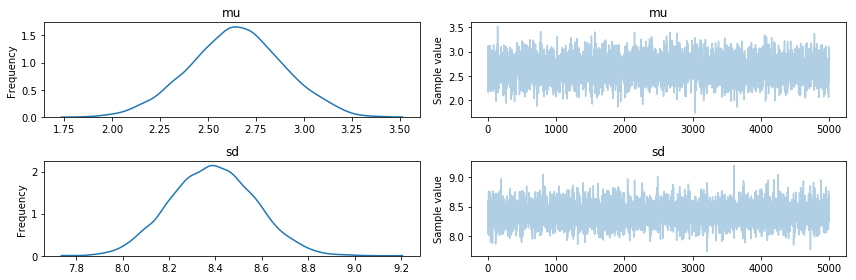

In [63]:
pm.traceplot(trace);

In [64]:
ppc = pm.sample_ppc(trace, samples=5000, model=model, size=100)

100%|██████████| 5000/5000 [00:01<00:00, 3305.68it/s]


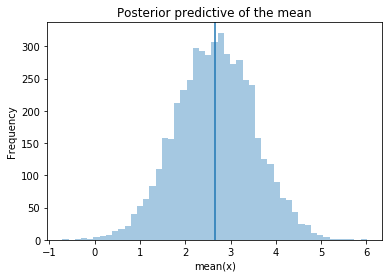

In [65]:
ax = plt.subplot()
sns.distplot([n.mean() for n in ppc['n']], kde=False, ax=ax)
ax.axvline(JD_Array.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');